# Task 1
## Principal Component Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pca import svd, read_data, center_data, get_lines_along_principal_directions

Read and plot the data

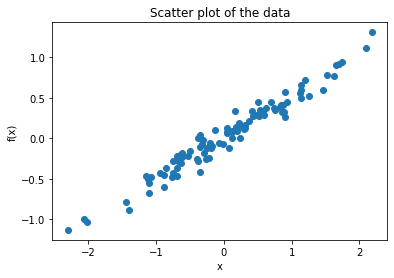

In [2]:
# plot the data
data = read_data()
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.show()

Center the data and plot the centered data vs the original one

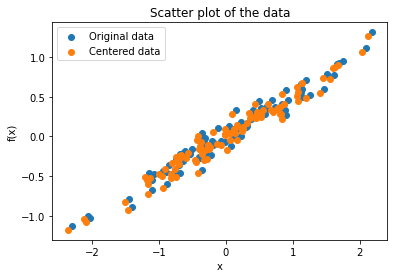

In [3]:
# plot the centered data vs the original one
centered_data = center_data(data)
plt.scatter(data[:, 0], data[:, 1], color='tab:blue', label='Original data')
plt.scatter(centered_data[:, 0], centered_data[:, 1], color='tab:orange', label='Centered data')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.legend()
plt.show()


SVD decomposition of the (centered) data

In [4]:
# SVD decomposition
U, S, V = svd(centered_data, center=False)

# check that "data" can be reconstructed from U, S and Vt
print("Norm of the difference between the centered data and its reconstruction through SVD: ",
      np.linalg.norm(centered_data - U @ S @ V.T))

Norm of the difference between the centered data and its reconstruction through SVD:  5.175015341989463e-15


The difference of between the centered data and its reconstruction
through the SVD is very small, therefore we can state that the SVD
is computed correctly.

How much energy is contained into each of the 2 components?

In [5]:
sigma1, sigma2 = S[0, 0], S[1, 1]
tot = sigma1 + sigma2
perc_energy_sigma1 = sigma1 * 100 / tot
perc_energy_sigma2 = sigma2 * 100 / tot
print(f"sigma1 contains {round(perc_energy_sigma1, 2)}% of the energy")
print(f"sigma2 contains {round(perc_energy_sigma2, 2)}% of the energy")

sigma1 contains 92.33% of the energy
sigma2 contains 7.67% of the energy


Plot the (centered) data its 2 principal components

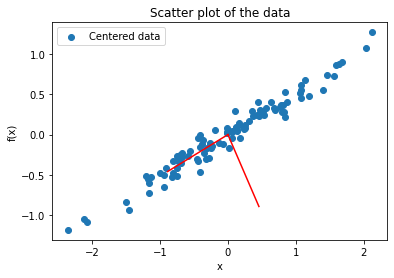

In [41]:
# scatter plot of the centered data
plt.scatter(centered_data[:, 0], centered_data[:, 1], label='Centered data')

# plot the 2 principal components as vectors
origin = np.mean(centered_data, axis=0)
m1, q1 = get_lines_along_principal_directions(pt1=origin, pt2=V[:, 0])
m2, q2 = get_lines_along_principal_directions(pt1=origin, pt2=V[:, 1])
# plt.scatter(V[:, 0], V[:, 1], color='red')
# plt.scatter(origin, origin, color='green')
# print(V[:, 0], V[:, 1])

# x = np.arange(-2, 2, 0.1)
# plt.plot(x, m1 * x + q1, color='g')
# x = np.arange(-0.5, 0.5, 0.1)
# plt.plot(x, m2 * x + q2, color='g')

x_values = [origin[0], V[:, 0][0]]
y_values = [origin[1], V[:, 0][1]]
plt.plot(x_values, y_values, color='r')

x_values = [origin[0], V[:, 1][0]]
y_values = [origin[1], V[:, 1][1]]
plt.plot(x_values, y_values, color='r')

# US = U @ S
# x_values = [origin[0], origin[0] + U[0, 0] * S[0, 0]]
# y_values = [origin[1], origin[1] + U[1, 0] * S[0, 0]]
# plt.plot(x_values, y_values, color='r')
#
# x_values = [origin[0], origin[0] + U[0, 1] * S[1, 1]]
# y_values = [origin[1], origin[1] + U[1, 1] * S[1, 1]]
# plt.plot(x_values, y_values, color='r')

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Scatter plot of the data")
plt.legend()
plt.show()